# Save figures for publication
Author: Pia Rautenstrauch

Date: 2024-09-03

## Requirements
- [x] Fontsize: >= 7
- [x] font: Arial
- [x] dpi: 600


## Other modifications
- [x] random order of plotting of colors in umap (https://github.com/scverse/scanpy/issues/891)

Anaconda environment: scib_no_defaults

In [1]:
# Imports
import os
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import scib
import scanpy as sc
import seaborn as sns
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib import rc

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
scib.__version__

'1.1.5'

In [4]:
# From https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_size_units.html
mm = 1/25.4  # millimeters in inches

In [5]:
sc.set_figure_params(dpi_save=600, dpi=80, transparent=True, format='png', fontsize=7, figsize=(25*mm, 1.2*2/3*25*mm))

In [6]:
plt.rcParams['figure.figsize']

[0.984251968503937, 0.7874015748031495]

In [7]:
# overwrite scanpy/matplotlib default font: chose: Arial

In [8]:
# Need to remove chached fonts

In [9]:
! rm ~/.cache/matplotlib -rf

In [10]:
font_dirs = ["/fast/AG_Ohler/prauten/conda_envs/scib_no_defaults/fonts"]  # The path to the custom font file.
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

In [11]:
# change font
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Arial"

In [12]:
plt.rcParams['lines.markersize'] = 3.0

In [13]:
# Unify color scheme
color_dict = {
 's1': '#0173b2',
 's2': '#de8f05',
 's3': '#029e73',
 's4': '#d55e00',
 'B1 B': '#023fa5ff',
 'CD14+ Mono': '#7d87b9ff',
 'CD16+ Mono': '#bec1d4ff',
 'CD4+ T activated': '#d6bcc0ff',
 'CD4+ T naive': '#bb7784ff',
 'CD8+ T': '#8e063bff',
 'CD8+ T naive': '#4a6fe3ff',
 'cDC2': '#8595e1ff',
 'Erythroblast': '#b5bbe3ff',
 'G/M prog': '#e6afb9ff',
 'HSC': '#e07b91ff',
 'ID2-hi myeloid prog': '#d33f6aff',
 'ILC': '#11c638ff',
 'Lymph prog': '#8dd593ff',
 'MK/E prog': '#c6dec7ff',
 'Naive CD20+ B': '#ead3c6ff',
 'NK': '#f0b98dff',
 'Normoblast': '#ef9708ff',
 'pDC': '#0fcfc0ff',
 'Plasma cell': '#9cded6ff',
 'Proerythroblast': '#d5eae7ff',
 'Transitional B': '#f3e1ebff',
 's1d1': '#1f77b4ff',
 's1d2': '#ff7f0eff',
 's1d3': '#279e68ff',
 's2d1': '#d62728ff',
 's2d4': '#aa40fcff',
 's2d5': '#8c564bff',
 's3d10': '#e377c2ff',
 's3d3': '#b5bd61ff',
 's3d6': '#17becfff',
 's3d7': '#aec7e8ff',
 's4d1': '#ffbb78ff',
 's4d8': '#98df8aff',
 's4d9': '#ff9896ff'}

In [14]:
def plot_umaps(models):
    np.random.seed(61)

    # Collect computed scores, nested dict is simple to convert to pd.DataFrame
    for model in models:
        # Load data
        embedding =  ad.read_h5ad("embeddings/{}.embedding.h5ad".format(model))
        
        # Read embeddings
        embedding.obsm['X_emb'] = embedding.X

        # Compute neighbors 
        sc.pp.neighbors(embedding, use_rep='X_emb')
        sc.tl.umap(embedding)

        
        # Transfer batch information and cell type labels to embedding
        embedding.obs['site'] = embedding.obs['batch'].apply(lambda x: x.split("d")[0])
        embedding.obs['donor'] = embedding.obs['batch'].apply(lambda x: x.split("d")[1])

        # make sure these variables are categorical
        embedding.obs['batch'] = embedding.obs['batch'].astype('category')
        embedding.obs['site'] = embedding.obs['site'].astype('category')
        embedding.obs['donor'] = embedding.obs['donor'].astype('category')

        # make sure these cell type is categorical
        embedding.obs['cell_type'] = embedding.obs['cell_type'].astype('category')

        # random plotting order
        embedding = sc.pp.subsample(embedding, fraction=1., copy=True)

        ### Save UMAP visualization as png 
        sc.pl.umap(
            embedding,
            color=['cell_type', 'batch', 'site'],
            size=0.3,
            frameon=False,
            ncols=1,
            wspace=-0.2,
            palette=color_dict,
            save="_{}.png".format(model),
            legend_loc=None,
            title=['','','']
            #legend_fontsize='x-small'
        )

    ### Save UMAP visualization as png 
    sc.pl.umap(
            embedding,
            color=['cell_type', 'batch', 'site'],
            size=0.3,
            frameon=False,
            ncols=1,
            wspace=-0.2,
            palette=color_dict,
            save="_{}_legend.png".format(model),
            legend_fontsize='xx-small',
            title=['','','']
    )


In [15]:
# List of identifiers of trained models
models = ['Liam_x5', 'Liam_x1', 'naiveIntegration', 'noIntegration']


In [16]:
# plt.rcParams["figure.figsize"] = (1.5*2/3, 1.2*2/3)

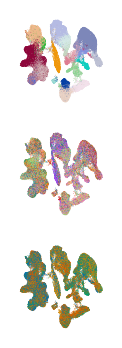

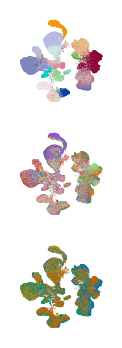

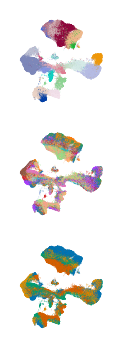

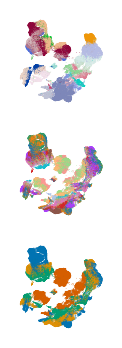

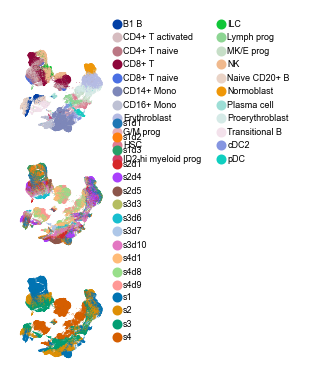

In [17]:
plot_umaps(models)

In [18]:
def plot_umaps(models):
    np.random.seed(61)

    # Collect computed scores, nested dict is simple to convert to pd.DataFrame
    for model in models:
        # Load data
        embedding =  ad.read_h5ad("embeddings/{}.embedding.h5ad".format(model))
        
        # Read embeddings
        embedding.obsm['X_emb'] = embedding.X

        # Compute neighbors 
        sc.pp.neighbors(embedding, use_rep='X_emb')
        sc.tl.umap(embedding)

        
        # Transfer batch information and cell type labels to embedding
        embedding.obs['site'] = embedding.obs['batch'].apply(lambda x: x.split("d")[0])
        embedding.obs['donor'] = embedding.obs['batch'].apply(lambda x: x.split("d")[1])

        # make sure these variables are categorical
        embedding.obs['batch'] = embedding.obs['batch'].astype('category')
        embedding.obs['site'] = embedding.obs['site'].astype('category')
        embedding.obs['donor'] = embedding.obs['donor'].astype('category')

        # make sure these cell type is categorical
        embedding.obs['cell_type'] = embedding.obs['cell_type'].astype('category')

        # random plotting order
        embedding = sc.pp.subsample(embedding, fraction=1., copy=True)

        ### Save UMAP visualization as png 
        sc.pl.umap(
            embedding,
            color=['batch', 'site', 'cell_type'],
            size=0.3,
            frameon=False,
            ncols=3,
            wspace=0.3,
            palette=color_dict,
            save="_{}_legend2.png".format(model),
            #legend_loc=None,
            title=['','',''],
            legend_fontsize='xx-small'
        )

    

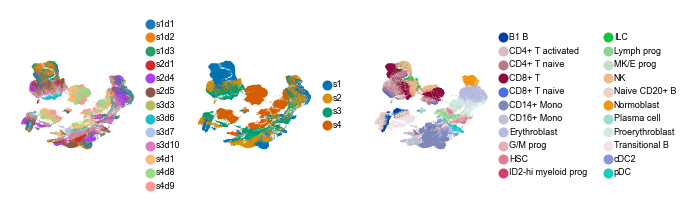

In [19]:
plot_umaps(['noIntegration'])

In [20]:
import matplotlib as mpl

font_settings = {key: value for key, value in mpl.rcParams.items() if 'font' in key.lower()}
for key, value in font_settings.items():
    print(f"{key}: {value}")


font.cursive: ['Apple Chancery', 'Textile', 'Zapf Chancery', 'Sand', 'Script MT', 'Felipa', 'Comic Neue', 'Comic Sans MS', 'cursive']
font.family: ['sans-serif']
font.fantasy: ['Chicago', 'Charcoal', 'Impact', 'Western', 'xkcd script', 'fantasy']
font.monospace: ['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']
font.sans-serif: ['Arial']
font.serif: ['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
font.size: 7.0
font.stretch: normal
font.style: normal
font.variant: normal
font.weight: normal
legend.fontsize: 6.44
legend.title_fontsize: 18.0
mathtext.fontset: dejavusans
pdf.fonttype: 3
pdf.use14corefonts: False
pgf.rcfonts: True
ps.fonttype: 3
svg.fonttype: path


In [21]:
print("Default font size:", plt.rcParams['font.size'])
print("Title font size:", plt.rcParams['axes.titlesize'])
print("Axes label font size:", plt.rcParams['axes.labelsize'])
print("X-tick label font size:", plt.rcParams['xtick.labelsize'])
print("Y-tick label font size:", plt.rcParams['ytick.labelsize'])
print("Legend font size:", plt.rcParams['legend.fontsize'])


Default font size: 7.0
Title font size: 7.0
Axes label font size: 7.0
X-tick label font size: 7.0
Y-tick label font size: 7.0
Legend font size: 6.44
